# Plot Throughput of Experiment 2.2 version 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import glob

## Functions Read CSV files of Throuhgput iperf2

In [2]:
def getDataframeThru(df,start_row,measurement_interval,header_range):
    '''
    This functions will import the data from txt file and return the dataframe without the header of txt file.
    Input: 
        measurement_interval = 30 (sec) : 
        header_range = 10 lines
        start_row = 0 
    Return: 
        df1t : dataframe of througput and jitter
    '''
    
    df1 = df.drop(labels=range(start_row, header_range), axis=0)
    df1t = df1.drop(labels=range(measurement_interval, len(df)), axis=0)
    
    return df1t

In [3]:
def getDatafromTxT(filename, headerrange):
    """
    Get dataframe from txt file:
    filename : xxx.txt
    headerrange : number of lines that needed to be removed. 
    
    return : df : datafame type
    """
    h = headerrange + 1
    skip_1 = list(range(0,h, 1))
    df = pd.read_csv(filename,
        skiprows=skip_1,
        header=None,
        delimiter=' ',
        skipinitialspace=True,
        error_bad_lines=False)
    return df

In [4]:
## Find start row index of itteration
def getStartEndID(df,start_data,end_data):
    """
    to clean dataframe and return the data with new header
    Input: 
        df : datafram without header of txt file 
    Output
        strat_indices_list : start indices list
    """
    # creating and passing series to new column
    df["Start"]= df[2].str.find(start_data)
    df["End"]= df[2].str.find(end_data)

    index = df.index
    strat_indices = index[df["Start"]==0.0]
    strat_indices_list = strat_indices.tolist()
    end_indices = index[df["End"]==0.0]
    end_indices_list = end_indices.tolist()
    
    
    return strat_indices_list, end_indices_list

In [5]:
def getCleanData(df,strat_indices_list,end_indices_list):
    """
    
    """
    df_all = df.drop(labels=range(1, len(df)), axis=0) # create new df
    start_row = 0
    c = 0
    for i in strat_indices_list: 
        
        h = i
        print('h =',h)
        m = end_indices_list[c]
        print('m =', m)
        df1 = getDataframeThru(df,start_row,m,h)
        print('df1 = ', df1)
        result = pd.concat([df_all,df1])
        df_all = result
        c = c + 1
        if i == 0:
            
            df_all = df_all.drop(labels=0, axis=0)
        
        
    return df_all

In [6]:
def superClean(filename,headerrange,start_data,end_data):
    """
    Clean Data from CSV file with remove the unnecessary header
    """
    df = getDatafromTxT(filename, headerrange)
    strat_indices_list, end_indices_list = getStartEndID(df,start_data,end_data)
    df_all = getCleanData(df,strat_indices_list,end_indices_list)
    df_all_new = df_all.drop(df_all.columns[[0,1,3,5,7,9]], axis=1)  # Replace new columns header
    df_all_new.rename({2 :'Interval', 4 : 'Transfer', 6 :'Bitrate', 8 :'Jitter', 10 :'Lost/Total Datagrams'}, axis=1, inplace=True)
    df = df_all_new.drop(range(0,1))
    df_all_new['Bitrate'] = df['Bitrate'].astype(float) 
    time = np.array(range(len(df_all_new.index)))

    df_all_new['Time'] = time
    df_all_new['Time'] = df_all_new['Time'].astype(int) 
    # avergae throughput 
    sumThroughput = df_all_new['Bitrate'].sum()
    avgSumThroughput = sumThroughput/len(time)
    var_throughput = df_all_new['Bitrate'].var()
    
    return avgSumThroughput, var_throughput


In [7]:
def readCSV2pd_Thru(directoryPath,tf_load,edge_name,start_data,end_data,headerrange):
    """
    This function is to read a CSV file and return the average value and varience
    input: directoryPath : path of file names
            tf_load : list of traffic load
    """
    avg_Thr = []
    var_Thr = []
    for tf in tf_load:
        cpu_data = pd.DataFrame()
        for file_name in glob.glob(directoryPath+edge_name+str(tf)+'.csv'):
            avg_thr,var_thr = superClean(file_name,headerrange,start_data,end_data)
            
            avg_Thr.append(avg_thr)
            var_Thr.append(var_thr)
    return avg_Thr, var_Thr

## Read file

In [8]:
headerrange = 7
start_data = '9.0-10.0'
end_data = '60.0-61.0'
tf_load  = [i*2 for i in range(2,20)]
edge_name = 'edge4_M'
directoryPath = '/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version3_Experiment_style/Experiment2_2/Edge4_iperf/'
avg_thr, var_thr = readCSV2pd_Thru(directoryPath,tf_load,edge_name,start_data,end_data,headerrange)

b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 86: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'


h = 8
m = 59
df1 =      0   1          2    3    4       5     6          7    8  Start  End
8   [  3]   9.0-10.0  sec  512  KBytes  4.20  Mbits/sec  NaN      0   -1
9   [  3]  10.0-11.0  sec  512  KBytes  4.20  Mbits/sec  NaN     -1   -1
10  [  3]  11.0-12.0  sec  511  KBytes  4.19  Mbits/sec  NaN     -1   -1
11  [  3]  12.0-13.0  sec  512  KBytes  4.20  Mbits/sec  NaN     -1   -1
12  [  3]  13.0-14.0  sec  512  KBytes  4.20  Mbits/sec  NaN     -1   -1
13  [  3]  14.0-15.0  sec  511  KBytes  4.19  Mbits/sec  NaN     -1   -1
14  [  3]  15.0-16.0  sec  512  KBytes  4.20  Mbits/sec  NaN     -1   -1
15  [  3]  16.0-17.0  sec  512  KBytes  4.20  Mbits/sec  NaN     -1   -1
16  [  3]  17.0-18.0  sec  511  KBytes  4.19  Mbits/sec  NaN     -1   -1
17  [  3]  18.0-19.0  sec  512  KBytes  4.20  Mbits/sec  NaN     -1   -1
18  [  3]  19.0-20.0  sec  512  KBytes  4.20  Mbits/sec  NaN     -1   -1
19  [  3]  20.0-21.0  sec  511  KBytes  4.19  Mbits/sec  NaN     -1   -1
20  [  3]  21.0-22.0  sec  512 

58  [  3]  59.0-60.0  sec  3.50  MBytes  29.4  Mbits/sec  NaN     -1   -1
h = 8
m = 59
df1 =      0   1          2    3     4       5     6          7    8  Start  End
8   [  3]   9.0-10.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN      0   -1
9   [  3]  10.0-11.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN     -1   -1
10  [  3]  11.0-12.0  sec  3.75  MBytes  31.4  Mbits/sec  NaN     -1   -1
11  [  3]  12.0-13.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN     -1   -1
12  [  3]  13.0-14.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN     -1   -1
13  [  3]  14.0-15.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN     -1   -1
14  [  3]  15.0-16.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN     -1   -1
15  [  3]  16.0-17.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN     -1   -1
16  [  3]  17.0-18.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN     -1   -1
17  [  3]  18.0-19.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN     -1   -1
18  [  3]  19.0-20.0  sec  3.75  MBytes  31.5  Mbits/sec  NaN     -1   -1
19  [  3]  20.0-21

b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 86: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 85: expected 9 fields, saw 12\n'
b'Skipping line 86: expected 9 fields, saw 12\n'


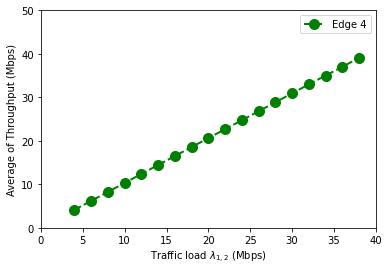

In [9]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)


ax.plot(tf_load, avg_thr, color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=10,label="Edge 4")

plt.ylim(0,50)
plt.xlim(0,40)
plt.xlabel('Traffic load $\lambda_{4,1}$ (Mbps)')
# naming the y axis
plt.ylabel('Average of Throughput (Mbps)')

plt.legend()

plt.show()